In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import sklearn
from sklearn.model_selection import train_test_split
import math,copy

In [2]:
data = pd.read_csv('housing.csv')

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
# one hot encoding
data = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,True,False,False,False


In [6]:
data_mean = data.mean()
data_std = data.std()
data_scaled = (data - data_mean) / data_std
data_scaled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327803,1.052523,0.982119,-0.804800,-0.970301,-0.974405,-0.977009,2.344709,2.129580,-0.681873,-0.015566,2.830673,-0.384457
1,-1.322812,1.043159,-0.607004,2.045841,1.348243,0.861418,1.669921,2.332181,1.314124,-0.681873,-0.015566,2.830673,-0.384457
2,-1.332794,1.038478,1.856137,-0.535733,-0.825541,-0.820757,-0.843616,1.782656,1.258663,-0.681873,-0.015566,2.830673,-0.384457
3,-1.337785,1.038478,1.856137,-0.624199,-0.718750,-0.766010,-0.733764,0.932945,1.165072,-0.681873,-0.015566,2.830673,-0.384457
4,-1.337785,1.038478,1.856137,-0.462393,-0.611959,-0.759828,-0.629142,-0.012881,1.172871,-0.681873,-0.015566,2.830673,-0.384457
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758808,1.801603,-0.289180,-0.444974,-0.388886,-0.512579,-0.443438,-1.216099,-1.115777,1.466479,-0.015566,-0.353256,-0.384457
20636,-0.818702,1.806285,-0.845373,-0.888682,-0.920466,-0.944382,-1.008396,-0.691576,-1.124443,1.466479,-0.015566,-0.353256,-0.384457
20637,-0.823693,1.778194,-0.924829,-0.174991,-0.125468,-0.369528,-0.174037,-1.142566,-0.992722,1.466479,-0.015566,-0.353256,-0.384457
20638,-0.873605,1.778194,-0.845373,-0.355591,-0.305826,-0.604415,-0.393743,-1.054557,-1.058583,1.466479,-0.015566,-0.353256,-0.384457


In [7]:
data_scaled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327803,1.052523,0.982119,-0.804800,-0.970301,-0.974405,-0.977009,2.344709,2.129580,-0.681873,-0.015566,2.830673,-0.384457
1,-1.322812,1.043159,-0.607004,2.045841,1.348243,0.861418,1.669921,2.332181,1.314124,-0.681873,-0.015566,2.830673,-0.384457
2,-1.332794,1.038478,1.856137,-0.535733,-0.825541,-0.820757,-0.843616,1.782656,1.258663,-0.681873,-0.015566,2.830673,-0.384457
3,-1.337785,1.038478,1.856137,-0.624199,-0.718750,-0.766010,-0.733764,0.932945,1.165072,-0.681873,-0.015566,2.830673,-0.384457
4,-1.337785,1.038478,1.856137,-0.462393,-0.611959,-0.759828,-0.629142,-0.012881,1.172871,-0.681873,-0.015566,2.830673,-0.384457
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758808,1.801603,-0.289180,-0.444974,-0.388886,-0.512579,-0.443438,-1.216099,-1.115777,1.466479,-0.015566,-0.353256,-0.384457
20636,-0.818702,1.806285,-0.845373,-0.888682,-0.920466,-0.944382,-1.008396,-0.691576,-1.124443,1.466479,-0.015566,-0.353256,-0.384457
20637,-0.823693,1.778194,-0.924829,-0.174991,-0.125468,-0.369528,-0.174037,-1.142566,-0.992722,1.466479,-0.015566,-0.353256,-0.384457
20638,-0.873605,1.778194,-0.845373,-0.355591,-0.305826,-0.604415,-0.393743,-1.054557,-1.058583,1.466479,-0.015566,-0.353256,-0.384457


In [8]:
data_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20433 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   ocean_proximity_INLAND      20640 non-null  float64
 10  ocean_proximity_ISLAND      20640 non-null  float64
 11  ocean_proximity_NEAR BAY    20640 non-null  float64
 12  ocean_proximity_NEAR OCEAN  20640 non-null  float64
dtypes: float64(13)
memory usage: 2.

In [9]:
data_scaled.dropna(inplace = True)

In [10]:
data_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20433 non-null  float64
 1   latitude                    20433 non-null  float64
 2   housing_median_age          20433 non-null  float64
 3   total_rooms                 20433 non-null  float64
 4   total_bedrooms              20433 non-null  float64
 5   population                  20433 non-null  float64
 6   households                  20433 non-null  float64
 7   median_income               20433 non-null  float64
 8   median_house_value          20433 non-null  float64
 9   ocean_proximity_INLAND      20433 non-null  float64
 10  ocean_proximity_ISLAND      20433 non-null  float64
 11  ocean_proximity_NEAR BAY    20433 non-null  float64
 12  ocean_proximity_NEAR OCEAN  20433 non-null  float64
dtypes: float64(13)
memory usage: 2.2 MB


In [11]:
X_train, X_test, y_train, y_test = train_test_split(data_scaled.drop('median_house_value', axis=1),
                                                    data_scaled['median_house_value'],
                                                    test_size=0.2)

In [12]:
print(X_train.shape)
print(y_train.shape)

(16346, 12)
(16346,)


<Axes: >

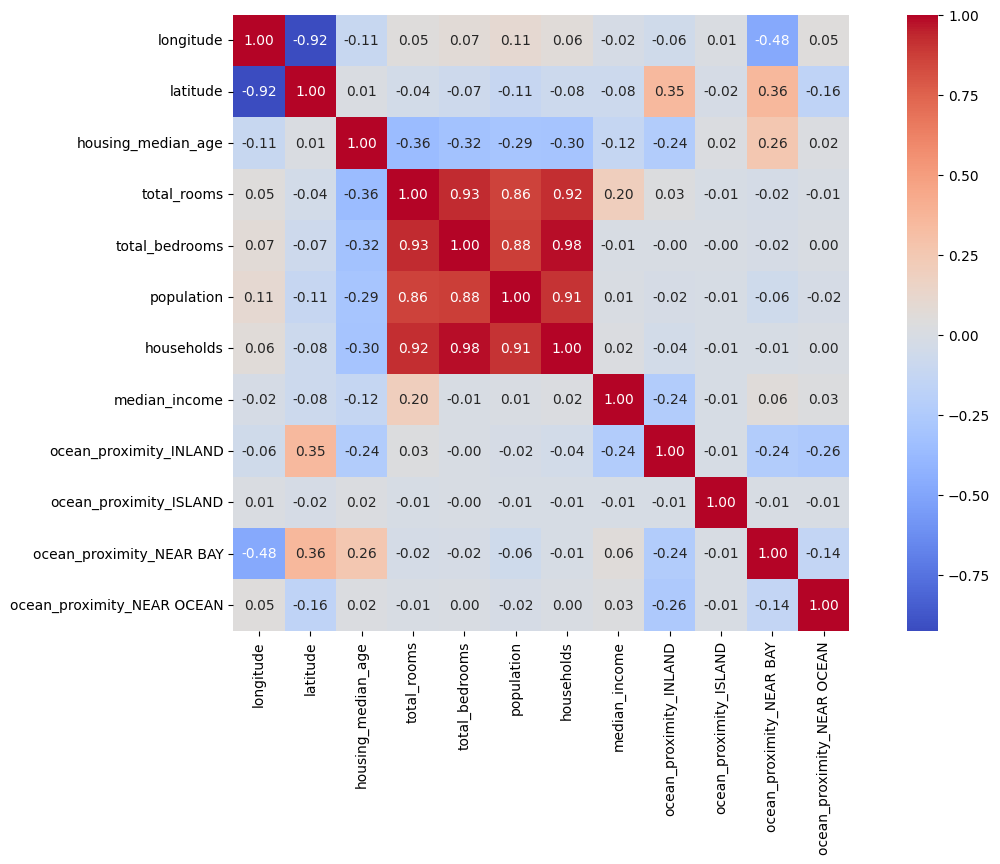

In [13]:
plt.figure(figsize=(15, 8))
sns.heatmap(X_train.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)

<Axes: xlabel='latitude', ylabel='longitude'>

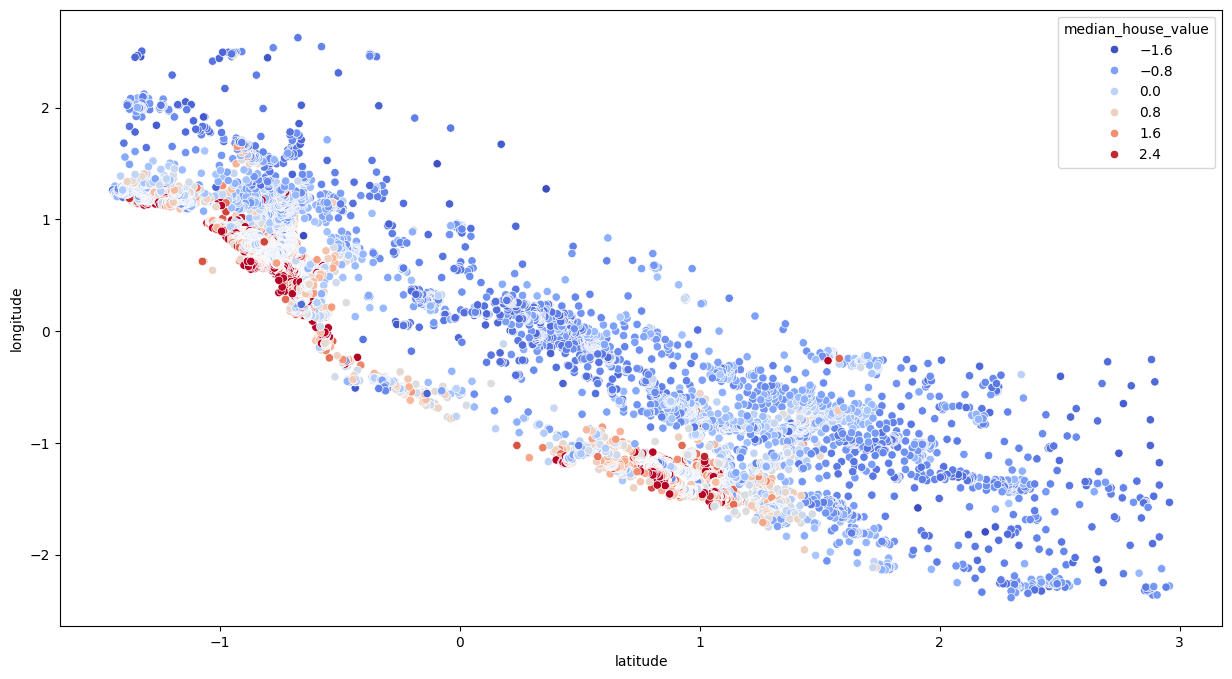

In [14]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='latitude', y='longitude', data=data_scaled,palette='coolwarm', hue='median_house_value')

In [15]:
print(X_train.shape)
print(y_train.shape)

(16346, 12)
(16346,)


In [16]:
def compute_cost(X,y,w,b):
    m = X.shape[0]
    cost = 0
    for i in range(m):
        cost = cost + ((np.dot(w,X[i])+b) - y[i]) **2
    cost = cost / (2*m)
    return cost

In [17]:
def compute_gradient(X,y,w,b):
    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0
    for i in range(m):
        err = (np.dot(w, X[i]) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i][j]
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db

In [18]:
def gradient_descent(X,y,w_in,b_in,alpha,num_iters):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    for i in range(num_iters):
        dj_dw , dj_db = compute_gradient(X,y,w,b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i < 100000:
            J_history.append(compute_cost(X, y, w, b))
        if i % 100 == 0:
            print(f"Iteration {i}: Cost {J_history[-1]:.4f}, w: {w}, b: {b}")
    return w, b, J_history
        

In [19]:
w_init = np.zeros(X_train.shape[1])
b_init = 0
alpha = 0.01
num_iters = 10000
w_final, b_final, J_history = gradient_descent(X_train.values, y_train.values, w_init, b_init, alpha, num_iters)
print(f"Final parameters: w: {w_final}, b: {b_final}")

Iteration 0: Cost 0.4903, w: [-0.00042387 -0.00146139  0.00108292  0.00131521  0.00049496 -0.00025278
  0.000658    0.00678938 -0.00481747  0.00029574  0.00157767  0.00137858], b: -5.262465992064325e-06
Iteration 100: Cost 0.2222, w: [-0.04170728 -0.06378391  0.06461289  0.06018698  0.02002544 -0.05150802
  0.02558485  0.40281687 -0.23690678  0.01708898  0.06470249  0.05472113], b: -0.00014737350655317512
Iteration 200: Cost 0.1976, w: [-0.06608293 -0.07569577  0.08867244  0.07341796  0.03795436 -0.0972281
  0.04034324  0.5323766  -0.27642332  0.02199307  0.05571875  0.05289714], b: 5.132171465440979e-05
Iteration 300: Cost 0.1924, w: [-0.08159383 -0.08261008  0.10307406  0.07449012  0.05829459 -0.13367751
  0.05609191  0.57915039 -0.27942504  0.02337429  0.03940943  0.04640312], b: 0.00023091321030396596
Iteration 400: Cost 0.1900, w: [-0.09370586 -0.09000633  0.11274288  0.07081254  0.07812014 -0.16428001
  0.07149802  0.5979724  -0.2764849   0.02364967  0.02690513  0.04158635], b: 0

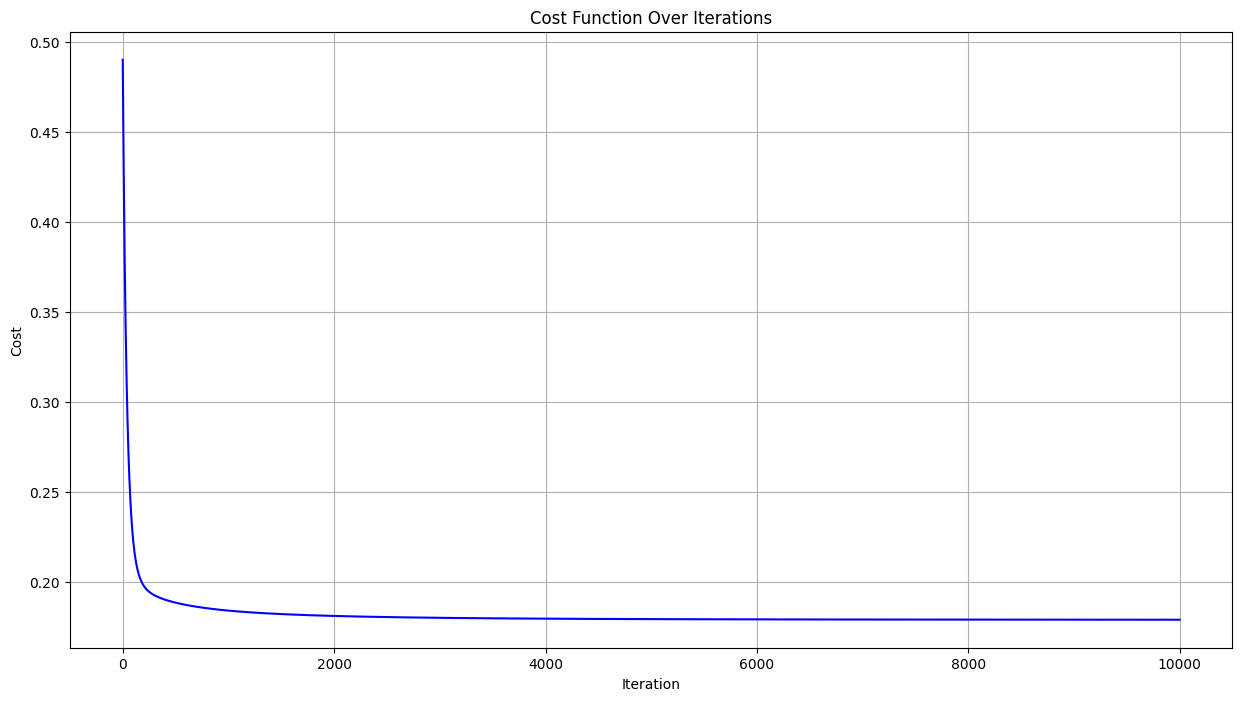

In [20]:
#plotting the cost function
plt.figure(figsize=(15, 8))
plt.plot(range(len(J_history)), J_history, color='blue')
plt.title('Cost Function Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.grid()
plt.show()

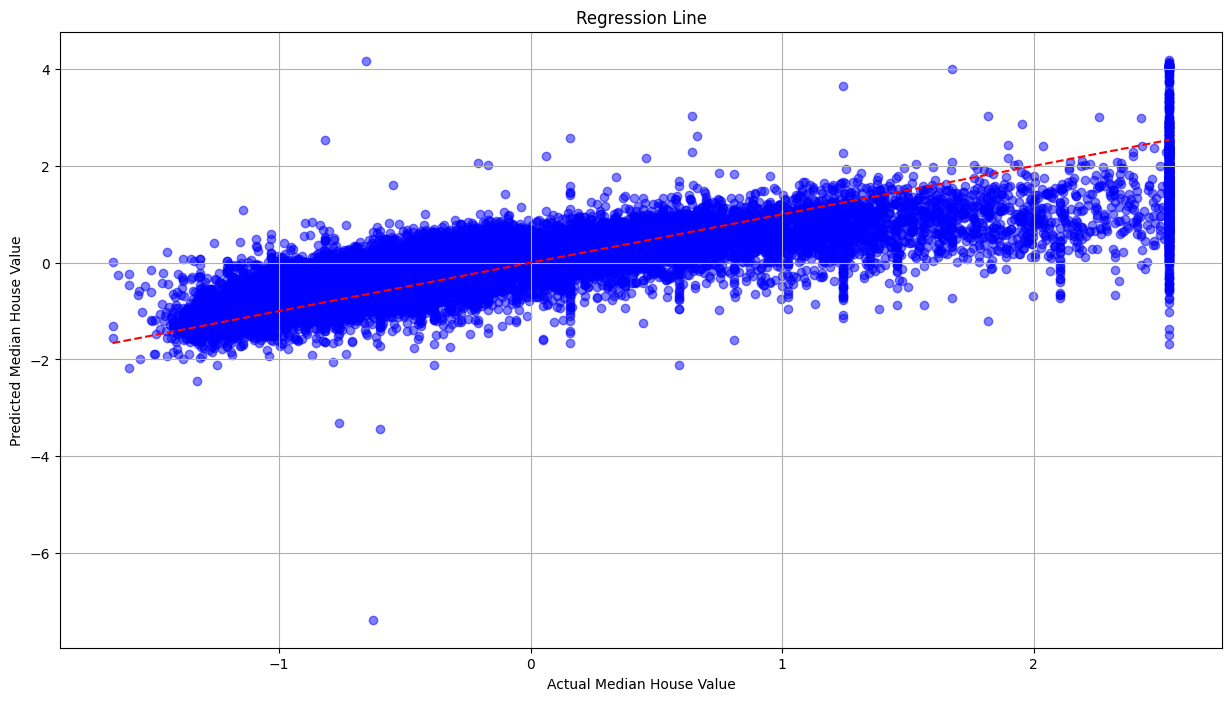

In [21]:
#plotting the regression line
plt.figure(figsize=(15, 8))
plt.scatter(y_train, np.dot(X_train.values, w_final) + b_final, color='blue', alpha=0.5)
plt.title('Regression Line')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')
plt.grid()
plt.show()

In [22]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
3745,0.583821,-0.689089,0.425926,0.001025,0.099979,-0.243255,0.134597,0.225405,-0.681873,-0.015566,-0.353256,-0.384457
3082,0.753522,0.022537,-1.083741,-0.308837,-0.320065,-0.614128,-0.466978,-0.853065,1.466479,-0.015566,-0.353256,-0.384457
1642,-1.103200,1.094659,-1.957759,6.598889,4.765545,5.499101,4.863499,0.889257,1.466479,-0.015566,-0.353256,-0.384457
14,-1.342777,1.038478,1.856137,0.003317,0.209142,-0.188507,0.315069,-1.028502,-0.681873,-0.015566,2.830673,-0.384457
10665,0.848354,-0.946585,-0.289180,-0.169032,-0.424482,-0.494036,-0.396359,2.062998,-0.681873,-0.015566,-0.353256,-0.384457
...,...,...,...,...,...,...,...,...,...,...,...,...
15576,1.342482,-1.208764,-1.401566,2.099929,2.480224,2.447343,2.621978,-0.520034,-0.681873,-0.015566,-0.353256,-0.384457
15948,-1.427627,0.982297,1.856137,0.442900,0.474932,0.745741,0.385689,0.011964,-0.681873,-0.015566,2.830673,-0.384457
9706,-1.038314,0.481349,1.061575,0.744970,0.716991,0.518802,0.788483,-0.179949,-0.681873,-0.015566,-0.353256,-0.384457
15974,-1.412653,0.977615,1.458856,-0.673246,-0.683153,-0.417212,-0.644835,0.211614,-0.681873,-0.015566,2.830673,-0.384457


In [23]:
X_test_values = X_test.values
X_test_values

array([[ 0.58382128, -0.68908906,  0.42592579, ..., -0.01556583,
        -0.35325571, -0.38445718],
       [ 0.75352161,  0.02253728, -1.08374113, ..., -0.01556583,
        -0.35325571, -0.38445718],
       [-1.10319967,  1.09465856, -1.95775882, ..., -0.01556583,
        -0.35325571, -0.38445718],
       ...,
       [-1.03831425,  0.48134901,  1.06157502, ..., -0.01556583,
        -0.35325571, -0.38445718],
       [-1.41265322,  0.97761475,  1.45885579, ..., -0.01556583,
         2.83067345, -0.38445718],
       [ 0.5039623 , -0.67504381,  0.42592579, ..., -0.01556583,
        -0.35325571, -0.38445718]])

In [24]:
y_test

3745     1.367853
3082    -1.207635
1642     0.059311
14      -0.412978
10665    2.540349
           ...   
15576   -0.347984
15948    0.389479
9706     0.122571
15974    0.303687
3970     0.518600
Name: median_house_value, Length: 4087, dtype: float64

In [25]:
y_test_values = y_test.values
y_test_values.reshape(-1, 1)

array([[ 1.36785251],
       [-1.20763528],
       [ 0.0593106 ],
       ...,
       [ 0.12257123],
       [ 0.3036873 ],
       [ 0.51860014]])

In [26]:
y_predicted = np.dot(X_test_values, w_final) + b_final
y_predicted = (y_predicted + data_mean['median_house_value']) * data_std['median_house_value']
y_actual = (y_test_values + data_mean['median_house_value']) * data_std['median_house_value']
for i in range(len(y_test)):
    print(f"Actual: {y_actual[i]}, Predicted: {y_predicted[i]}")


Actual: 23870412233.5923, Predicted: 23870313482.52243
Actual: 23870115033.5923, Predicted: 23870116636.63068
Actual: 23870261233.592304, Predicted: 23870231731.351887
Actual: 23870206733.592304, Predicted: 23870250230.37833
Actual: 23870547534.5923, Predicted: 23870421035.014736
Actual: 23870394833.5923, Predicted: 23870429798.615116
Actual: 23870226433.5923, Predicted: 23870271715.169235
Actual: 23870271433.5923, Predicted: 23870270339.48187
Actual: 23870199333.5923, Predicted: 23870244815.966774
Actual: 23870287433.5923, Predicted: 23870228303.46981
Actual: 23870125533.5923, Predicted: 23870162456.072342
Actual: 23870547534.5923, Predicted: 23870721236.858105
Actual: 23870288433.5923, Predicted: 23870306543.901775
Actual: 23870161633.5923, Predicted: 23870183362.581554
Actual: 23870273733.5923, Predicted: 23870321627.138783
Actual: 23870198033.592304, Predicted: 23870270110.021416
Actual: 23870416433.5923, Predicted: 23870389828.085625
Actual: 23870272233.5923, Predicted: 2387028646

In [ ]:
from sklearn.metrics import  r2_score

r2 = r2_score(y_actual, y_predicted)
print(f' R^2: {r2}')


 R^2: 0.6665320583219901
